In [2]:
# Upload google drive in our COLAB

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# install tensorflow version 2
%tensorflow_version 2.x


In [4]:
# Importing librar

import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np


In [5]:
# Create path

train_loc = '/content/drive/MyDrive/Colab Notebooks/dataset/dataset02/train'
test_loc = '/content/drive/MyDrive/Colab Notebooks/dataset/dataset02/val'

In [6]:
# resize images 

trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

traindata = trdata.flow_from_directory(directory = train_loc, target_size = (224,224))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

testdata = tsdata.flow_from_directory(directory = test_loc, target_size = (224,224))

Found 250 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [7]:
traindata.class_indices

{'COVID+': 0, 'COVID-': 1}

In [8]:
# define input image
input_shape = (224,224,3)

# create the CNN
img_input = Input(shape  = input_shape, name = 'img_input')
x = Conv2D(32, (3,3) , padding = 'same' , activation='relu', name = 'layer_1') (img_input)
x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_2') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_3') (x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_5') (x)
x = Dropout(0.25)(x)
x = Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_7') (x)
x = Dropout(0.25)(x)
x = Flatten(name = 'fc_1')(x)
x = Dense(64, name = 'lyaer_8')(x)
x = Dropout(0.5) (x)
x = Dense(2, activation='sigmoid', name='predictions')(x)


In [9]:
# Generate our model
model = Model(inputs = img_input, outputs =x)

In [10]:
# Print network structure
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 layer_3 (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 layer_4 (Conv2D)            (None, 112, 112, 64)      36928     
                                                                 
 layer_5 (MaxPooling2D)      (None, 56, 56, 64)        0     

In [11]:
# Compiling the model
model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])

In [ ]:
# start the training 
batch_size = 32
hist = model.fit(traindata, steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testdata,validation_steps = testdata.samples//batch_size,
                 epochs = 10
                 )

Epoch 1/10
7/7 [==============================] - 88s 12s/step - loss: 3.3613 - accuracy: 0.5734 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 12s 2s/step - loss: 0.5575 - accuracy: 0.7431 - val_loss: 0.4977 - val_accuracy: 0.8750
Epoch 3/10
7/7 [==============================] - 12s 2s/step - loss: 0.3641 - accuracy: 0.8761 - val_loss: 0.3448 - val_accuracy: 0.8854
Epoch 4/10
7/7 [==============================] - 12s 2s/step - loss: 0.3833 - accuracy: 0.8486 - val_loss: 0.3585 - val_accuracy: 0.8646
Epoch 5/10
7/7 [==============================] - 12s 2s/step - loss: 0.3012 - accuracy: 0.8624 - val_loss: 0.3918 - val_accuracy: 0.9062
Epoch 6/10
7/7 [==============================] - 12s 2s/step - loss: 0.2912 - accuracy: 0.8899 - val_loss: 0.3391 - val_accuracy: 0.8958
Epoch 7/10
7/7 [==============================] - 12s 2s/step - loss: 0.1567 - accuracy: 0.9541 - val_loss: 0.1962 - val_accuracy: 0.9167
Epoch 8/10
7/7 [=================

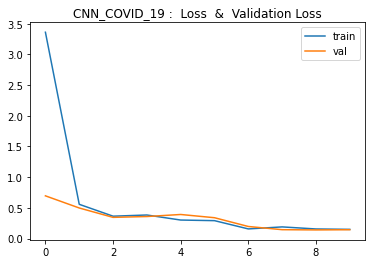

In [ ]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('CNN_COVID_19 :  Loss  &  Validation Loss')
plt.legend()
plt.show()

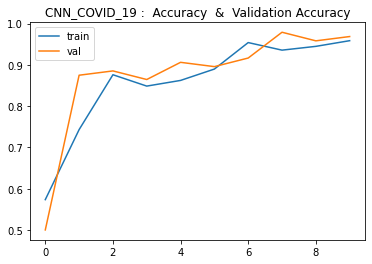

In [ ]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('CNN_COVID_19 :  Accuracy  &  Validation Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[31 24]
 [25 30]]
classification_Report
              precision    recall  f1-score   support

      COVID+       0.55      0.56      0.56        55
      COVID-       0.56      0.55      0.55        55

    accuracy                           0.55       110
   macro avg       0.55      0.55      0.55       110
weighted avg       0.55      0.55      0.55       110



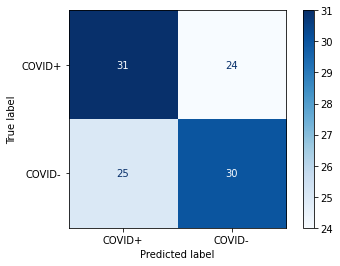

In [ ]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['COVID+', 'COVID-']
label_names = [0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred ,  axis = 1)

cm = confusion_matrix(testdata.classes, y_pred, labels = label_names)


print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))

print('classification_Report')
print(classification_report(testdata.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()


In [ ]:
model.save("smodels/covid-19-modelCNN.h5")